<a href="https://colab.research.google.com/github/jshankarrepo/ml-projects/blob/master/home-credit-default-risk/Home_Credit_Default_Risk_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Home Credit Default Risk**

##**1.Business/Real-world Problem**

###**1.1 Default Risk**

**Default risk** is the risk that a lender takes on in the chance that a borrower will be unable to make the required payments on their debt obligation. Lenders and investors are exposed to default risk in virtually all forms of **credit** extensions. A higher level of default risk leads to a higher required return, and in turn, a higher interest rate.

Source Link: [Investopedia.com](https://www.investopedia.com/terms/d/defaultrisk.asp#:~:text=Default%20risk%20is%20the%20risk,all%20forms%20of%20credit%20extensions.)

###**1.2 Problem Statement**

Generally, loan application in any bank or lender is higher, but due to poor or non-existent credit history records, all of them do not get loans. Unfortunately, this has led the untrustworthy lenders to exploit this community of people.

###**1.3 Source/Useful Links**

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

Source Dataset: https://www.kaggle.com/c/home-credit-default-risk/overview


###**1.4 Real-world/Business objectives and constraints**

1. Use ROC curve as a metric to validate the results
2. Less than a minute Response time 

##**2. Machine Learning Problem**

###**2.1. Data Download**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# copy kaggle token file from google drive to colab
!mkdir -p ~/.kaggle
!cp "/content/drive/My Drive/Colab Notebooks/kaggle/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
import os 
!mkdir data
if not os.listdir('data') :
  !kaggle competitions download -c 'home-credit-default-risk'
  !unzip -o -d data/ application_train.csv.zip
  !unzip -o -d data/ application_test.csv.zip
  !unzip -o -d data/ bureau.csv.zip
  !unzip -o -d data/ bureau_balance.csv.zip
  !unzip -o -d data/ credit_card_balance.csv.zip
  !unzip -o -d data/ installments_payments.csv.zip
  !unzip -o -d data/ previous_application.csv.zip
  !unzip -o -d data/ POS_CASH_balance.csv.zip

 86% 5.00M/5.81M [00:00<00:00, 20.9MB/s]
100% 5.81M/5.81M [00:00<00:00, 22.9MB/s]
 72% 41.0M/56.8M [00:00<00:00, 35.9MB/s]
100% 56.8M/56.8M [00:00<00:00, 68.7MB/s]
 99% 107M/109M [00:01<00:00, 91.8MB/s] 
100% 109M/109M [00:01<00:00, 92.6MB/s]
  0% 0.00/524k [00:00<?, ?B/s]
100% 524k/524k [00:00<00:00, 170MB/s]
 95% 258M/271M [00:02<00:00, 78.6MB/s]
100% 271M/271M [00:02<00:00, 98.2MB/s]
 86% 83.0M/96.7M [00:01<00:00, 63.8MB/s]
100% 96.7M/96.7M [00:01<00:00, 90.8MB/s]
 84% 31.0M/36.8M [00:00<00:00, 46.5MB/s]
100% 36.8M/36.8M [00:00<00:00, 82.5MB/s]
 69% 25.0M/36.1M [00:00<00:00, 43.9MB/s]
100% 36.1M/36.1M [00:00<00:00, 61.1MB/s]
  0% 0.00/36.5k [00:00<?, ?B/s]
100% 36.5k/36.5k [00:00<00:00, 32.4MB/s]
 96% 73.0M/76.3M [00:00<00:00, 70.9MB/s]
100% 76.3M/76.3M [00:00<00:00, 112MB/s] 
Archive:  application_train.csv.zip
  inflating: data/application_train.csv  
Archive:  application_test.csv.zip
  inflating: data/application_test.csv  
Archive:  bureau.csv.zip
  inflating: data/bureau.csv  

####**2.1.1. Data Overview**

Overall there are 9 CSV files and the description as follows:

**1 & 2. application_{train|test}** - This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

**3. bureau** - All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

**4. bureau_balance** - Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

**5. POS_CASH_balance** - Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

**6. credit_card_balance** - Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

**7. previous_application** - All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

**8. installments_payments** - Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

**9. HomeCredit_columns_description** - This file contains descriptions for the columns in the various data files.

**The hierarchical relationship of the data**:

<img src = 'https://imgur.com/wjPtASD.png' />

###**2.2. Mapping the real-world problem to an ML problem**

####**2.2.1. Type of Machine Learning Problem**

It is a Classification problem, the goal is to train a model to learn how to predict the target variable.

**0 - indicates the person will repay the loan**

**1 - will have difficulty repaying the loan**.

####**2.2.2. Performance Metric**

**Soruce**: https://www.kaggle.com/c/home-credit-default-risk/overview/evaluation

**Metric**: ROC AUC curve

###**2.3. Train and Test Dataset**

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

## **3. Data Loading**

In [ ]:
import pandas as pd

In [ ]:
def convert_object_to_cat_type(df):
  """
  Convert Object to Category datatype in pandas dataframe
  """
  for col in df.select_dtypes('object').columns.to_list():
    df[col] = df[col].astype('category')
  return df

In [ ]:
def convert_float_to_int_type(df, columns):
  """
  Convert float to Category datatype in pandas dataframe
  """
  for col in columns:
    df[col] = df[col].fillna(0).astype(int)
  return df

### **3.1 Application (train|test)**

In [ ]:
app_train = pd.read_csv('data/application_train.csv')
app_test = pd.read_csv('data/application_test.csv')
print("Application Training Dataset INFO: Records: {}, Features: {}".format(app_train.shape[0], app_train.shape[1]))
print("Application test Dataset INFO: Records: {}, Features: {}".format(app_test.shape[0], app_test.shape[1]))

Application Training Dataset INFO: Records: 307511, Features: 122
Application test Dataset INFO: Records: 48744, Features: 121


In [ ]:
list(app_train.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [ ]:
app_train.column# merge train and test
app = app_train.append(app_test).reset_index(drop=True)
del app_train, app_test

In [ ]:
app.TARGET.fillna(value='UNKNOWN', inplace=True)

In [ ]:
app.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,ORGANIZATION_TYPE_nan,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,FONDKAPREMONT_MODE_nan,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_nan,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002.0,1,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.067329,0.498036,202500.0,0.121978,0.060749,2.007889,0.121978,0.060749,0.067329
1,100003.0,0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,0.533482,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.070862,0.208736,135000.0,0.132217,0.027598,4.790750,0.132217,0.027598,0.070862
2,100004.0,0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506155,0.555912,0.729567,0.0880,0.0765,0.9816,0.7552,0.0213,0.00,0.1379,0.1667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.011814,0.500000,67500.0,0.100000,0.050000,2.000000,0.100000,0.050000,0.011814
3,100006.0,0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506155,0.650442,0.533482,0.0880,0.0765,0.9816,0.7552,0.0213,0.00,0.1379,0.1667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.159905,0.431748,67500.0,0.219900,0.094941,2.316167,0.219900,0.094941,0.159905
4,100007.0,0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,11.0,0.0,0.0,0.0,0.0,1.0,1.0,0.506155,0.322738,0.533482,0.0880,0.0765,0.9816,0.7552,0.0213,0.00,0.1379,0.1667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.152418,0.236842,121500.0,0.179963,0.042623,4.222222,0.1799

In [ ]:
int_columns = ['SK_ID_CURR','CNT_CHILDREN','OWN_CAR_AGE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE',
               'FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','OBS_30_CNT_SOCIAL_CIRCLE',
               'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

app = convert_float_to_int_type(app, int_columns)
del int_columns

In [ ]:
app = convert_object_to_cat_type(app)

### **3.2 Bureau and Bureau Balance**

In [ ]:
bureau = pd.read_csv('data/bureau.csv')
bureau_balance = pd.read_csv('data/bureau_balance.csv')
print("Bureau Dataset INFO: Records: {}, Features: {}".format(bureau.shape[0], bureau.shape[1]))
print("Bureau Balance Dataset INFO: Records: {}, Features: {}".format(bureau_balance.shape[0], bureau_balance.shape[1]))

Bureau Dataset INFO: Records: 1716428, Features: 17
Bureau Balance Dataset INFO: Records: 27299925, Features: 3


In [ ]:
bureau = convert_object_to_cat_type(bureau)

In [ ]:
bureau_balance = convert_object_to_cat_type(bureau_balance)

### **3.3 Previous Application**

In [ ]:
prev = pd.read_csv('data/previous_application.csv')

In [ ]:
prev = convert_object_to_cat_type(prev)p

In [ ]:
re

### **3.4 POS Cash Balance**

In [ ]:
pos = pd.read_csv('data/POS_CASH_balance.csv')

In [ ]:
pos = convert_object_to_cat_type(pos)

### **3.5 Installment Payments**

In [ ]:
installment = pd.read_csv('data/installments_payments.csv')

In [ ]:
installment = convert_object_to_cat_type(installment)

### **3.6 Credit Card Balance**

In [ ]:
cc_bal = pd.read_csv('data/credit_card_balance.csv')

In [ ]:
cc_bal = convert_object_to_cat_type(cc_bal)

##**4. Exploratory Data Analysis**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

###**4.1 Plot Functions Definitions**

In [ ]:
# quantile plot function
def quantile_plt(quantiles):
  plt.figure(figsize=(10,5))
  plt.title("Quantiles and their Values")
  
  quantiles.plot()
  # quantiles with 0.05 difference
  plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
  # quantiles with 0.25 difference
  plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
  plt.ylabel('No of ratings by user')
  plt.xlabel('Value at the quantile')
  plt.legend(loc='best')


  # annotate the 25th, 50th, 75th and 100th percentile values....
  for x,y in zip(quantiles.index[::25], quantiles[::25]):
      plt.annotate(s="({} , {})".format(x,y), xy=(x,y),fontweight='bold')
  plt.show()

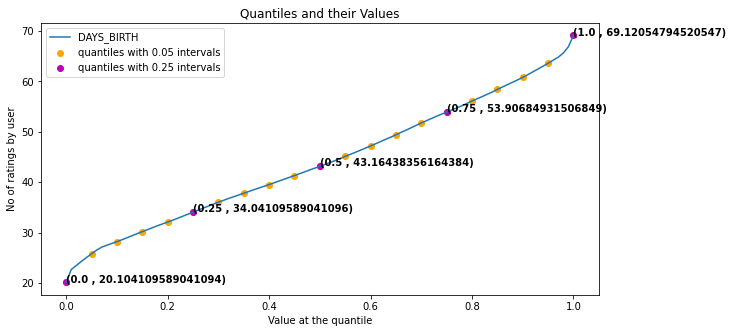

In [ ]:
days_birth_quantile = (app['DAYS_BIRTH'] / -365).quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantile_plt(days_birth_quantile)

### 4.2 Target variable distribution

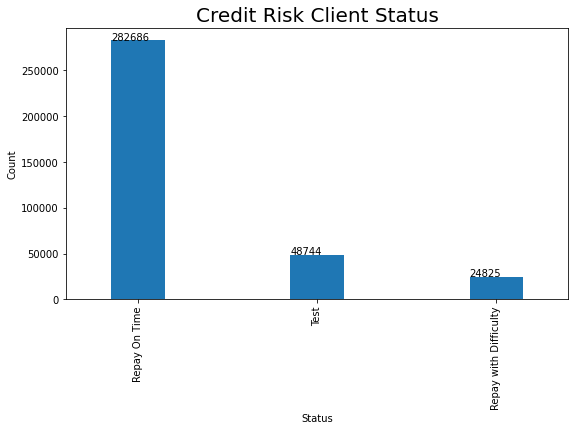

In [ ]:
fig, axs = plt.subplots(figsize=(9, 5))
app['TARGET'].value_counts().plot.bar(ax = axs, width = 0.3)
axs.set_title('Credit Risk Client Status', fontsize = 20)
axs.set_xticklabels(['Repay On Time', 'Test', 'Repay with Difficulty'])
for p in axs.patches:
  axs.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
axs.set_xlabel('Status')
axs.set_ylabel('Count')
plt.show()

#### Observation
1. There nearly 282 thousand customer has no repaying on time and 24 thousand customers had difficulty
2. There are 48744 Test points to predict home credit default risk
3. It is observed that the target class label is highly imbalance in which 0 indicates the person will repay and 1 will have difficulty in repaying the loan.


###**4.3 Missing Value Analysis**

In [ ]:
#https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
def missing_values(df):
  
  #count missing values 
  count_missing_vals = df.isnull().sum()

  #calculate percentage of missing values in each column
  percent_missing_vals = 100 * df.isnull().sum() / df.shape[0]

  #concat missing values and percentage into a dataframe
  miss_vals_df = pd.concat([count_missing_vals, percent_missing_vals], axis=1)

  #rename to meaningful column names
  miss_vals_df = miss_vals_df.rename(columns = {0: 'Missing Values', 1: 'Total Percentage'})

  #remove 0 percentage values 
  miss_vals_df = miss_vals_df[miss_vals_df.iloc[:,1] != 0]

  #sort table by percentage
  miss_vals_df.sort_values(by='Total Percentage', ascending=False, inplace = True)

  #summary 
  print("Total number of columns in dataframe is {}, out of which {} columns has missing values".format(df.shape[1], miss_vals_df.shape[0]))
  
  #return the missing values dataframe
  return miss_vals_df

In [ ]:
app_train_miss_vals_df = missing_values(app)
print("\n",app_train_miss_vals_df.head(20))

Total number of columns in dataframe is 122, out of which 61 columns has missing values

                           Missing Values  Total Percentage
COMMONAREA_MEDI                   248360         69.714109
COMMONAREA_MODE                   248360         69.714109
COMMONAREA_AVG                    248360         69.714109
NONLIVINGAPARTMENTS_MODE          246861         69.293343
NONLIVINGAPARTMENTS_MEDI          246861         69.293343
NONLIVINGAPARTMENTS_AVG           246861         69.293343
FONDKAPREMONT_MODE                243092         68.235393
LIVINGAPARTMENTS_MEDI             242979         68.203674
LIVINGAPARTMENTS_MODE             242979         68.203674
LIVINGAPARTMENTS_AVG              242979         68.203674
FLOORSMIN_MODE                    241108         67.678489
FLOORSMIN_MEDI                    241108         67.678489
FLOORSMIN_AVG                     241108         67.678489
YEARS_BUILD_AVG                   236306         66.330578
YEARS_BUILD_MODE         

#### Observation
1. There are total of 122 columns and 61 columns contain missing values.
2. It looks like top 20 missing columns are feature engineered variable such as median, mode and average
3. The missing values issue is addressed using Imputation technique

### 4.4  Total Income

In [ ]:
#https://stackoverflow.com/a/21140339
Series(app['AMT_INCOME_TOTAL'].describe()).apply(lambda x: '%.3f' % x)

count       356255.000
mean        170116.060
std         223506.819
min          25650.000
25%         112500.000
50%         153000.000
75%         202500.000
max      117000000.000
Name: AMT_INCOME_TOTAL, dtype: object

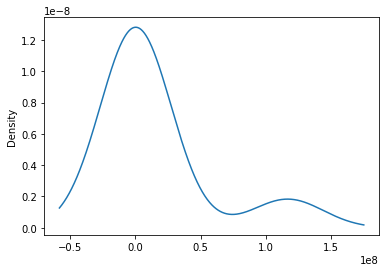

In [ ]:
Series(app['AMT_INCOME_TOTAL'].describe()).apply(lambda x: '%.3f' % x).astype(float).plot.kde()

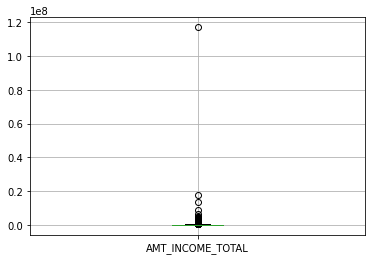

In [ ]:
app.boxplot(column='AMT_INCOME_TOTAL')

Using simple boxplot it is observed that there are outlier point in the "AMT_INCOME_TOTAL" feature so lets analyse further by using quantile plot

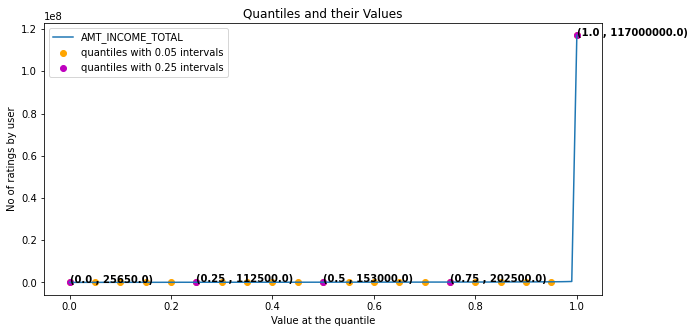

In [ ]:
amt_income_total_quantile = app['AMT_INCOME_TOTAL'].quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantile_plt(amt_income_total_quantile)

The plot packs in the last 5% of the points. To dig deep, we can again plot the quantile plot with only last 5 percentage of points

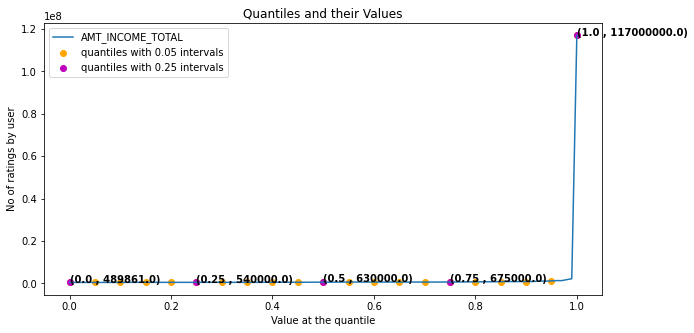

In [ ]:
amt_income_total_quantile_last_1_per = app[app['AMT_INCOME_TOTAL'] > amt_income_total_quantile.get(0.99)].AMT_INCOME_TOTAL.quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantile_plt(amt_income_total_quantile_last_1_per)

In [ ]:
len(app[app['AMT_INCOME_TOTAL'] >= 117000000.0])

1

##### Observation
1. In this Kernel Density Estimate plot, the most number of income falls in the mean range and the fewer customers has salary more then mean. The distribution is right skewed.
2. When Quantile plot is zoomed to 99th percentile, it is observed that there an outlier pot and this can also be seen in Boxplot (value: 117000000)

### 4.5 Amount Credited

In [ ]:
#https://stackoverflow.com/a/21140339
Series(app['AMT_CREDIT'].describe()).apply(lambda x: '%.3f' % x)

count     356255.000
mean      587767.414
std       398623.694
min        45000.000
25%       270000.000
50%       500211.000
75%       797557.500
max      4050000.000
Name: AMT_CREDIT, dtype: object

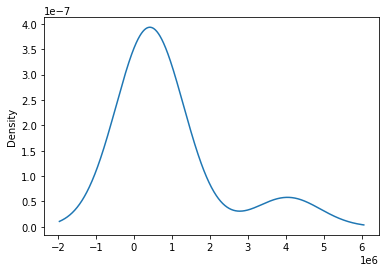

In [ ]:
Series(app['AMT_CREDIT'].describe()).apply(lambda x: '%.3f' % x).astype(float).plot.kde()

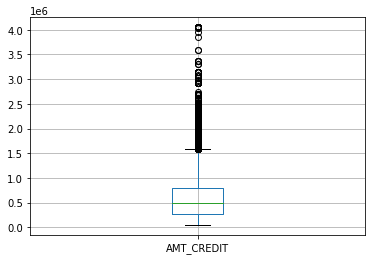

In [ ]:
app.boxplot(column='AMT_CREDIT')

Using simple boxplot it is observed that there are outlier point in the "AMT_CREDIT" feature so lets analyse further by using quantile plot

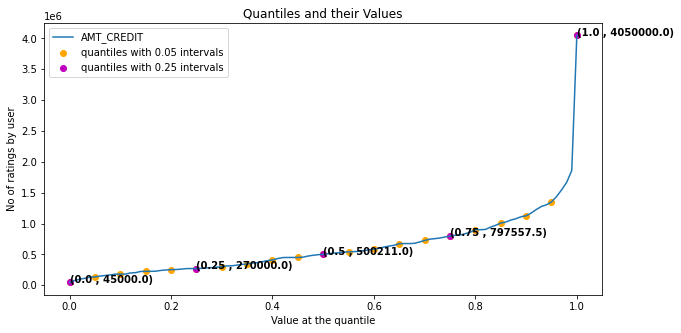

In [ ]:
amt_credit_quantile = app['AMT_CREDIT'].quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantile_plt(amt_credit_quantile)

The plot packs in the last 3% of the points. To dig deep, we can again plot the quantile plot with only last 10 percentage of points

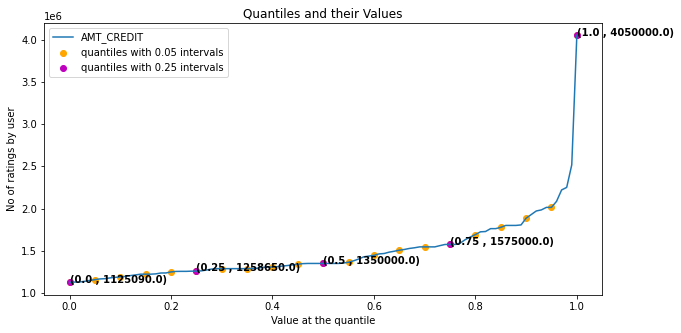

In [ ]:
amt_credit_quantile_last_1_per = app[app['AMT_CREDIT'] > amt_credit_quantile.get(0.90)].AMT_CREDIT.quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantile_plt(amt_credit_quantile_last_1_per)

In [ ]:
len(app[app['AMT_CREDIT'] >= 4050000])

8

#### Observation 
1. The KDE plot is a right skewed, which indicates most people received average/mean credit amount of the loan and the fewer got more.
2. Quantile plot shows that the last 0.1 percentage of the data contain outlier (4050000)

### 4.6 Days Birth

In [ ]:
#https://stackoverflow.com/a/21140339
Series((app['DAYS_BIRTH'] / -365).describe()).apply(lambda x: '%.3f' % x)

count    356255.000
mean         43.949
std          11.942
min          20.104
25%          34.041
50%          43.164
75%          53.907
max          69.121
Name: DAYS_BIRTH, dtype: object

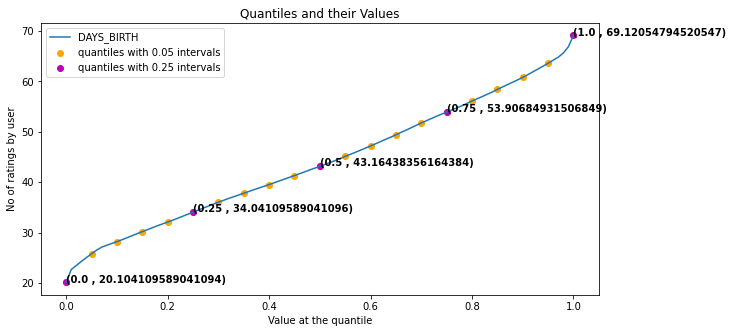

In [ ]:
days_birth_quantile = (app['DAYS_BIRTH'] / -365).quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantile_plt(days_birth_quantile)

The plot packs in the last 3% of the points. To dig deep, we can again plot the quantile plot with only last 10 percentage of points

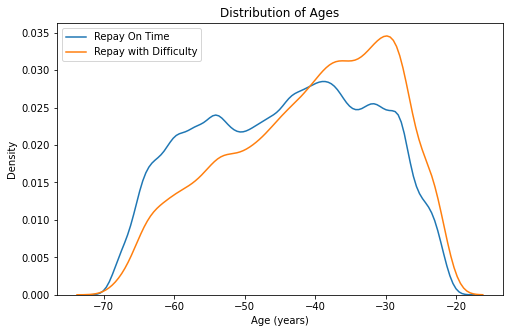

In [ ]:
plt.figure(figsize = (8, 5))

sns.kdeplot(app.loc[app['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Repay On Time')

sns.kdeplot(app.loc[app['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'Repay with Difficulty')

plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

#### Observation
1. The default risk age is roughly between 15 -75 age group and the age between 20s - 40s has higher risk which then declines as the age increases.
2. Age crossing 40 has higher chances for the repayment on time.

### 4.7 Days Employed

In [ ]:
#https://stackoverflow.com/a/21140339
Series(app['DAYS_EMPLOYED'].describe()).apply(lambda x: '%.3f' % x)

count    356255.000
mean      64317.231
std      141705.533
min      -17912.000
25%       -2781.000
50%       -1224.000
75%        -290.000
max      365243.000
Name: DAYS_EMPLOYED, dtype: object

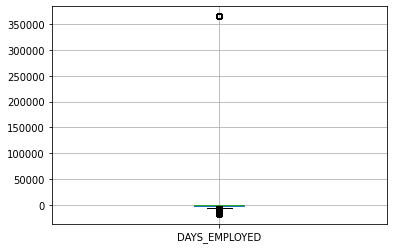

In [ ]:
app.boxplot('DAYS_EMPLOYED')

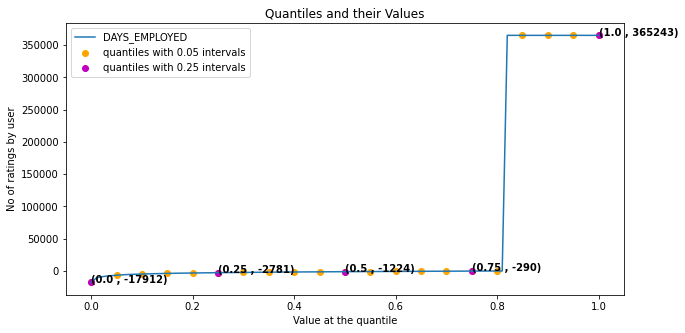

In [ ]:
# plot 1
days_employed_quantile = app['DAYS_EMPLOYED'].quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantile_plt(days_employed_quantile)

The plot packs in the last 3% of the points. To dig deep, we can again plot the quantile plot with only last 10 percentage of points

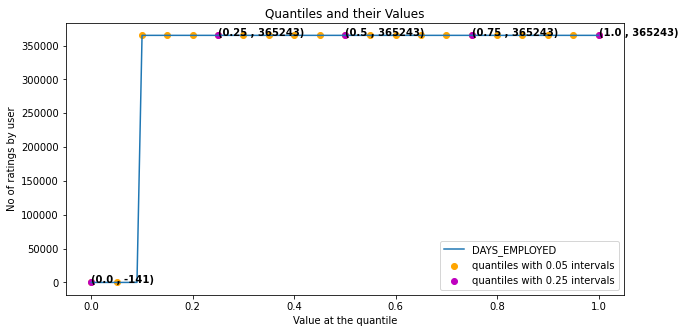

In [ ]:
#plot 2
amt_employed_quantile_last_1_per = app[app['DAYS_EMPLOYED'] > days_employed_quantile.get(0.80)].DAYS_EMPLOYED.quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantile_plt(amt_employed_quantile_last_1_per)

There is anomalous points in the 20% of points with 365243 value which is equal to 1000 years. 

##### Observation
1. Range from -17912 to -290 points are distributed between 0 to 80th percentiles. Last 20% there is a significant jump in the values.

2. Zooming in last 20% of points, most of the value is 365243 value which is equal to 1000 years so it is necessary to address this issue. **The one possible solution could be to change these points to NaN and use imputation technique to fill those gaps**

### 4.8 Gender

In [ ]:
# temp4 = app.groupby(['CODE_GENDER', 'TARGET']).CODE_GENDER.agg(['count'])
# #.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2))
# # temp4['per'] = temp4.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2))
# # temp4.loc[['F','M']]
# temp4['per'] = temp4.query("TARGET == [0.0, 1.0]").groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2))
# temp4.query("TARGET == [0.0, 1.0]")

In [ ]:
# temp2 = temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()) if (x != 'UNKNOWN') else False)
# temp2

188278 0.0 188278
94404 1.0 94404
4 2.0 4
14170 0.2 14170
10655 1.2 10655
0 2.1999999999999997 0
32678 0.39999999999999997 32678
16066 1.4 16066
0 2.4 0


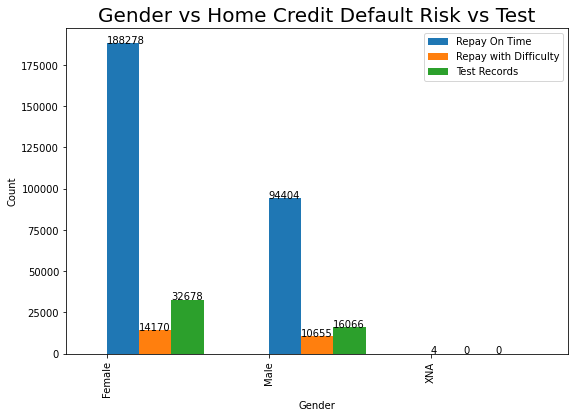

In [ ]:
fig, axs = plt.subplots(figsize=(9, 6))
axs = app.groupby(['CODE_GENDER', 'TARGET']).CODE_GENDER.agg(['count']).unstack().plot.bar(ax = axs, width = 0.6, align='edge')
axs.set_title('Gender vs Home Credit Default Risk vs Test', fontsize = 20)
axs.set_xlabel('Gender')
axs.set_xticklabels(["Female", "Male", "XNA"])
axs.set_ylabel('Count')
# annotate value count
for p in axs.patches:
  axs.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
  print(p.get_height(), p.get_x(), p.get_height())

axs.legend(['Repay On Time', 'Repay with Difficulty', 'Test Records'], loc='upper Right')
plt.show()

#### Observation
1. More Female customer has the tendency to repay compared to male. This indicated the risk is less on Female customers.
2. In Test data, female records are double compared to male
4. Preprocess Action - XNA has 4 points and it looks like an outlier points.
It can be removed.


### 4.9 Contract Type

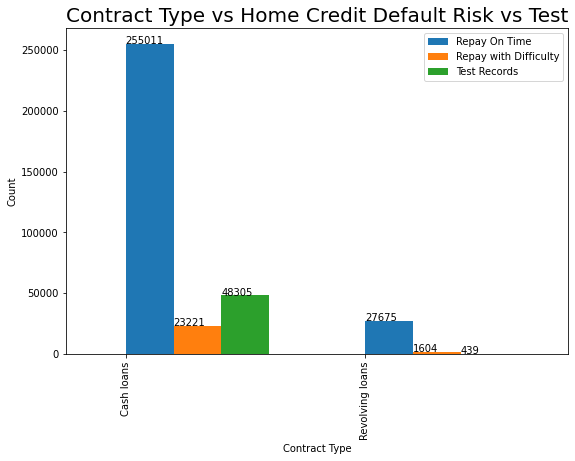

In [ ]:
fig, axs = plt.subplots(figsize=(9, 6))
axs = app.groupby(['NAME_CONTRACT_TYPE', 'TARGET']).NAME_CONTRACT_TYPE.agg(['count']).unstack().plot.bar(ax = axs, width = 0.6, align='edge')
axs.set_title('Contract Type vs Home Credit Default Risk vs Test', fontsize = 20)
axs.set_xlabel('Contract Type')
axs.set_xticklabels(["Cash loans", "Revolving loans"])
axs.set_ylabel('Count')
# annotate value count
for p in axs.patches:
  axs.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

axs.legend(['Repay On Time', 'Repay with Difficulty', 'Test Records'], loc='upper Right')
plt.show()

#### Observation
1. There are more customer on Cash loan when compared to Revolving Loans.
2. Also, loan credit risk rate for Cash loan is less compared to other.
3. There are fewer test records on Revolving loans.

### 4.11 Income Type

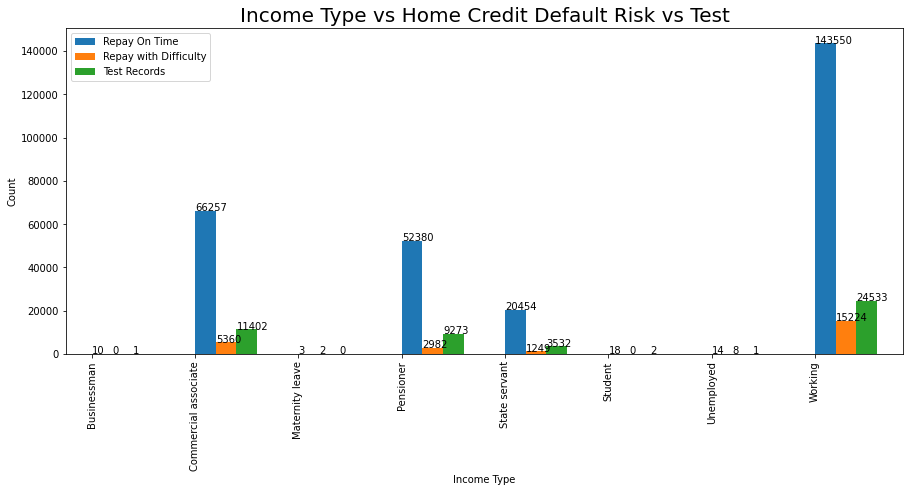

In [ ]:
fig, axs = plt.subplots(figsize=(15, 6))
axs = app.groupby(['NAME_INCOME_TYPE', 'TARGET']).NAME_INCOME_TYPE.agg(['count']).unstack().plot.bar(ax = axs, width = 0.6, align='edge')
axs.set_title('Income Type vs Home Credit Default Risk vs Test', fontsize = 20)
axs.set_xlabel('Income Type')
index_var = app.groupby(['NAME_INCOME_TYPE', 'TARGET']).NAME_INCOME_TYPE.agg(['count']).index
axs.set_xticklabels(pd.Series(index_var.get_level_values(0)).cat.categories)
axs.set_ylabel('Count')
# annotate value count
for p in axs.patches:
  axs.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

axs.legend(['Repay On Time', 'Repay with Difficulty', 'Test Records'], loc='upper Right')
plt.show()

#### Observation
1. Income type Working, commercial associate, pensioner, state servants had less risk and they repay rate is much higher. 
2. Student's had no risk, as all the 18 customers has higher repayment rate 

### 4.12 Education Type

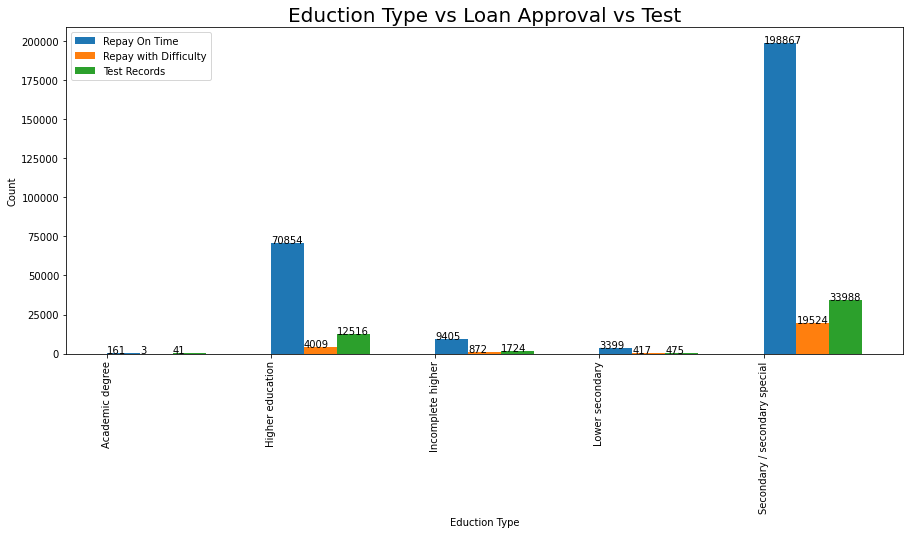

In [ ]:
fig, axs = plt.subplots(figsize=(15, 6))
axs = app.groupby(['NAME_EDUCATION_TYPE', 'TARGET']).NAME_EDUCATION_TYPE.agg(['count']).unstack().plot.bar(ax = axs, width = 0.6, align='edge')
axs.set_title('Eduction Type vs Loan Approval vs Test', fontsize = 20)
axs.set_xlabel('Eduction Type')
index_var = app.groupby(['NAME_EDUCATION_TYPE', 'TARGET']).NAME_INCOME_TYPE.agg(['count']).index
axs.set_xticklabels(pd.Series(index_var.get_level_values(0)).cat.categories)
axs.set_ylabel('Count')
# annotate value count
for p in axs.patches:
  axs.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

axs.legend(['Repay On Time', 'Repay with Difficulty', 'Test Records'], loc='upper Right')
plt.show()

#### Observation
1. Secondary/ Secondary Special and Higher Education's credit loan repayment are much higer compared to the education types. This also implies lower risk.
2. Out of 164 customers, except 3 all had higher repayment chances.


### 4.13 Family Status

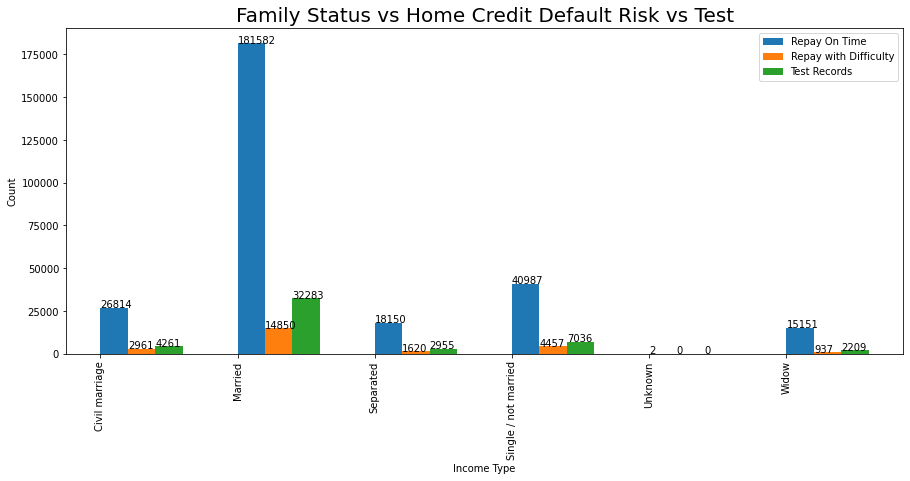

In [ ]:
fig, axs = plt.subplots(figsize=(15, 6))
axs = app.groupby(['NAME_FAMILY_STATUS', 'TARGET']).NAME_FAMILY_STATUS.agg(['count']).unstack().plot.bar(ax = axs, width = 0.6, align='edge')
axs.set_title('Family Status vs Home Credit Default Risk vs Test', fontsize = 20)
axs.set_xlabel('Income Type')
index_var = app.groupby(['NAME_FAMILY_STATUS', 'TARGET']).NAME_INCOME_TYPE.agg(['count']).index
axs.set_xticklabels(pd.Series(index_var.get_level_values(0)).cat.categories)
axs.set_ylabel('Count')
# annotate value count
for p in axs.patches:
  axs.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

axs.legend(['Repay On Time', 'Repay with Difficulty', 'Test Records'], loc='upper Right')
plt.show()

#### Observation
1. Married and Single martial status had higher chances of repayment

### 4.14  Occupation Type

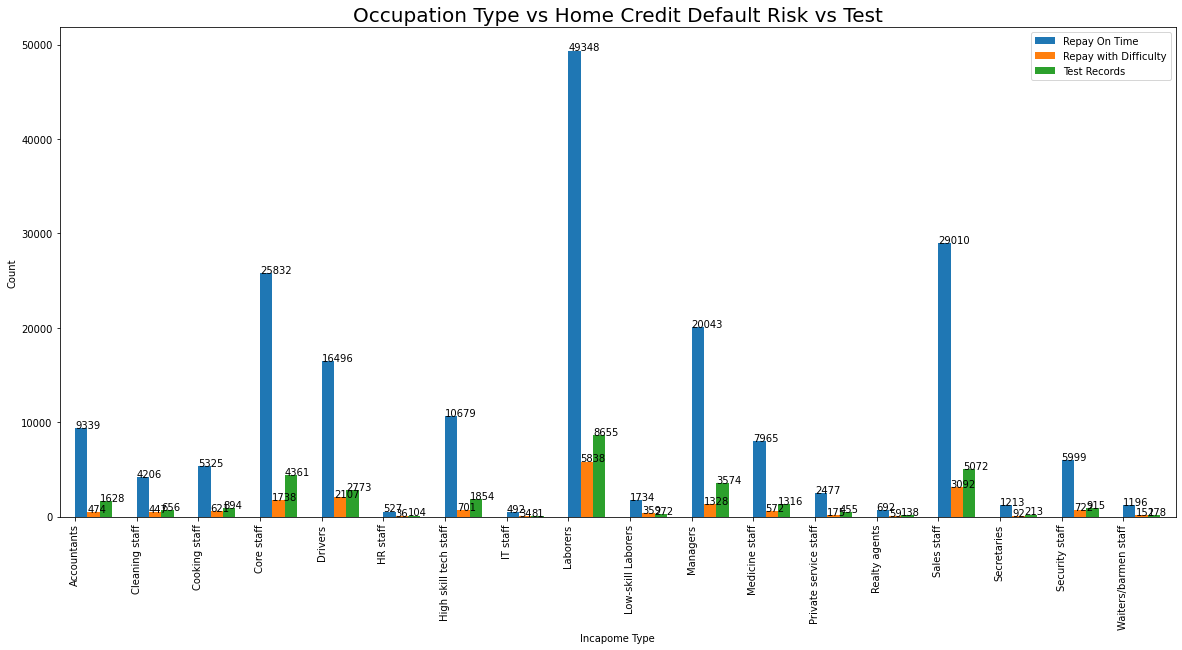

In [ ]:
fig, axs = plt.subplots(figsize=(20, 9))
axs = app.groupby(['OCCUPATION_TYPE', 'TARGET']).OCCUPATION_TYPE.agg(['count']).unstack().plot.bar(ax = axs, width = 0.6, align='edge')
axs.set_title('Occupation Type vs Home Credit Default Risk vs Test', fontsize = 20)
axs.set_xlabel('Incapome Type')
index_var = app.groupby(['OCCUPATION_TYPE', 'TARGET']).NAME_INCOME_TYPE.agg(['count']).index
axs.set_xticklabels(pd.Series(index_var.get_level_values(0)).cat.categories)
axs.set_ylabel('Count')
# annotate value count
for p in axs.patches:
  axs.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

axs.legend(['Repay On Time', 'Repay with Difficulty', 'Test Records'], loc='upper Right')
plt.show()

#### Observation
1. There are over 18 Occupation categories.
2. The top 5 significant applicants are Laborers, Sales staff, Core Staff, Manager and Driver.
3. Repayment rate is much less on drivers when compared to core staffs.
4. Similar trend can be seen in Accontants vs Cleaning Staffs, more applicants in Accontants but fewer approved when directly compared with cleaning staffs.

### 4.15 Family Members Count

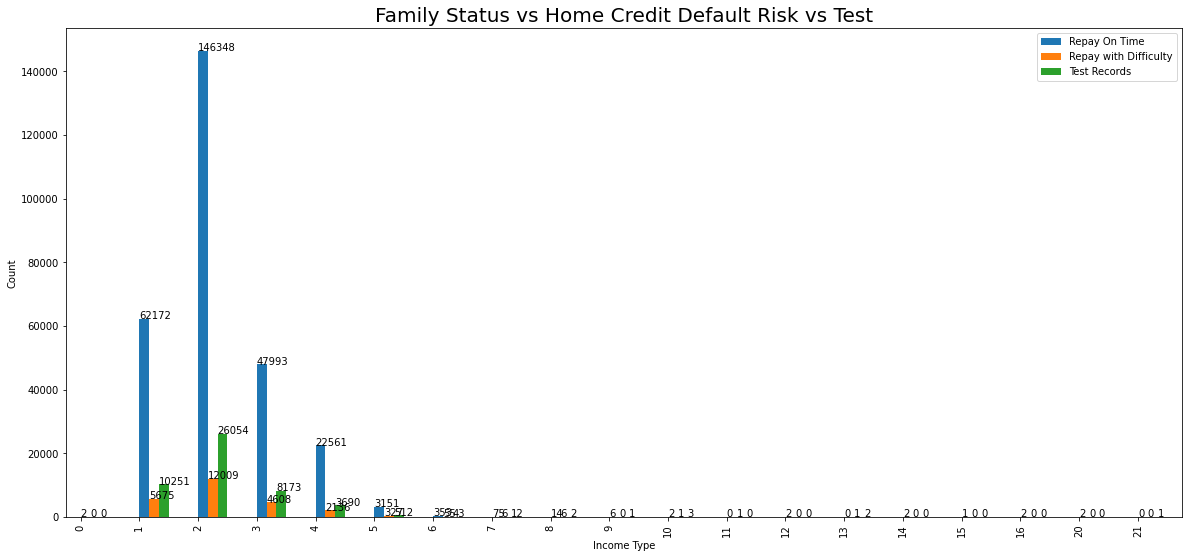

In [ ]:
fig, axs = plt.subplots(figsize=(20, 9))
axs = app.groupby(['CNT_FAM_MEMBERS', 'TARGET']).CNT_FAM_MEMBERS.agg(['count']).unstack().plot.bar(ax = axs, width = 0.5, align='edge')
axs.set_title('Family Status vs Home Credit Default Risk vs Test', fontsize = 20)
axs.set_xlabel('Income Type')
axs.set_xticklabels(np.unique(app.groupby(['CNT_FAM_MEMBERS', 'TARGET']).CNT_FAM_MEMBERS.agg(['count']).index.get_level_values(0).values))
axs.set_ylabel('Count')
# annotate value count
for p in axs.patches:
  axs.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

axs.legend(['Repay On Time', 'Repay with Difficulty', 'Test Records'], loc='upper Right')
plt.show()

#### Observation
1. Only two applicants with no family members


### 4.16 Days First Drawing

In [ ]:
#https://stackoverflow.com/a/21140339
Series(prev['DAYS_FIRST_DRAWING'].describe()).apply(lambda x: '%.3f' % x)

count    997149.000
mean     342209.855
std       88916.116
min       -2922.000
25%      365243.000
50%      365243.000
75%      365243.000
max      365243.000
Name: DAYS_FIRST_DRAWING, dtype: object

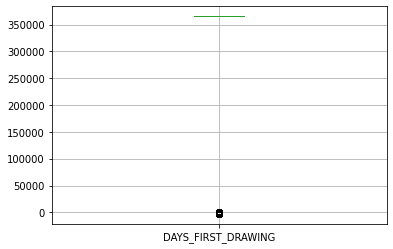

In [ ]:
prev.boxplot(column= 'DAYS_FIRST_DRAWING')

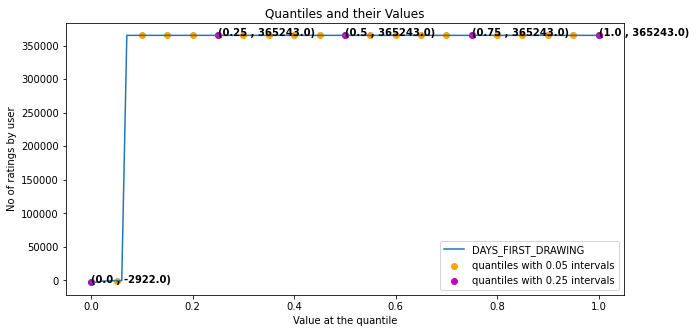

In [ ]:
# plot 1
days_first_drawing_quantile = prev['DAYS_FIRST_DRAWING'].quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantile_plt(days_first_drawing_quantile)

##### Observation
1. There are too many outlier points with 365243

### 4.17 Days First Due

In [ ]:
#https://stackoverflow.com/a/21140339
Series(prev['DAYS_FIRST_DUE'].describe()).apply(lambda x: '%.3f' % x)

count    997149.000
mean      13826.269
std       72444.870
min       -2892.000
25%       -1628.000
50%        -831.000
75%        -411.000
max      365243.000
Name: DAYS_FIRST_DUE, dtype: object

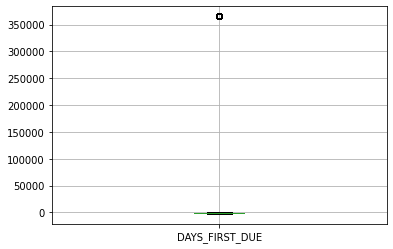

In [ ]:
prev.boxplot('DAYS_FIRST_DUE')

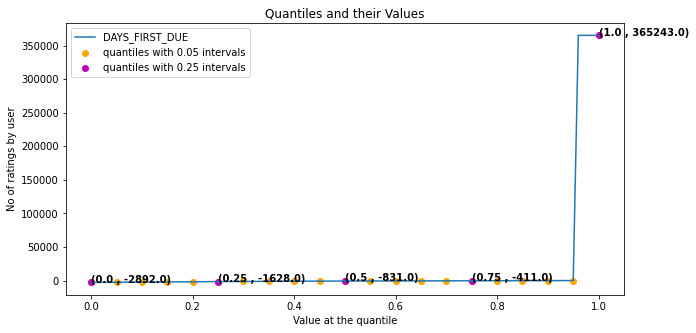

In [ ]:
# plot 1
days_first_due_quantile = prev['DAYS_FIRST_DUE'].quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantile_plt(days_first_due_quantile)

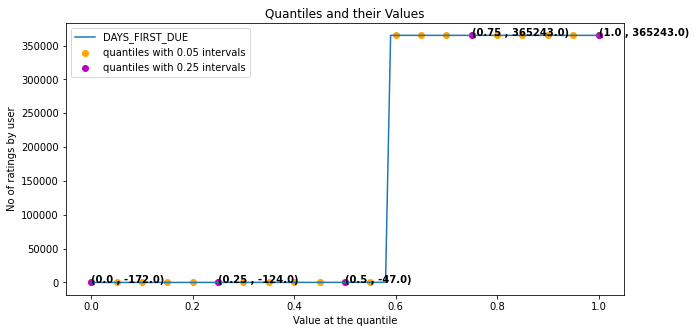

In [ ]:
#plot 2
days_first_due_quantile_last_1_per = prev[prev['DAYS_FIRST_DUE'] > days_first_due_quantile.get(0.90)].DAYS_FIRST_DUE.quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantile_plt(days_first_due_quantile_last_1_per)

##### Observation
1. The value starts from  -2892 points are distributed between 0 to 90th percentiles. Last 00% there is a significant jump in the values.

2. Zooming in last 00% of points, most of the value is 365243 value which is equal to 1000 years so it is necessary to address this issue. **The one possible solution could be to change these points to NaN and use imputation technique to fill those gaps**

### 4.18 Days First Due Version 1

In [ ]:
#https://stackoverflow.com/a/21140339
Series(prev['DAYS_LAST_DUE_1ST_VERSION'].describe()).apply(lambda x: '%.3f' % x)

count    997149.000
mean      33767.774
std      106857.035
min       -2801.000
25%       -1242.000
50%        -361.000
75%         129.000
max      365243.000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: object

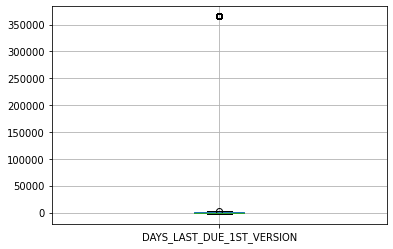

In [ ]:
prev.boxplot('DAYS_LAST_DUE_1ST_VERSION')

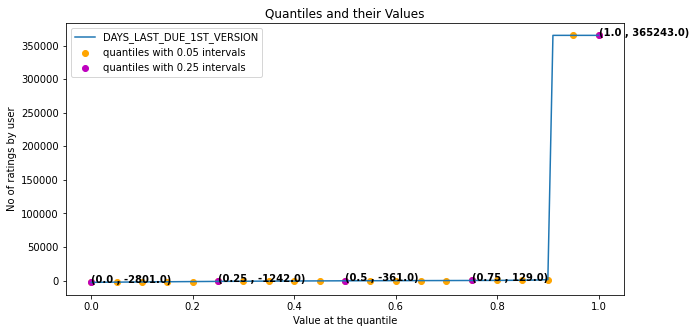

In [ ]:
# plot 1
days_first_due_v1_quantile = prev['DAYS_LAST_DUE_1ST_VERSION'].quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantile_plt(days_first_due_v1_quantile)

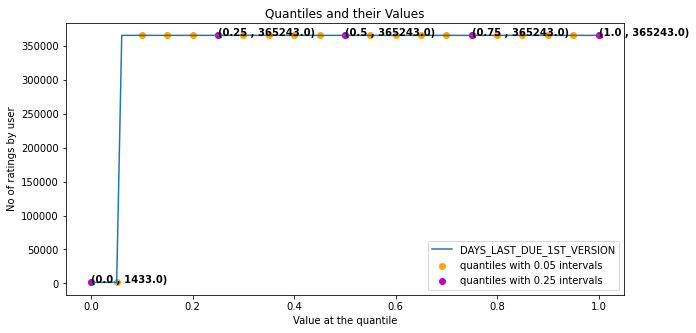

In [ ]:
#plot 2
days_first_due_v1_quantile_last_1_per = prev[prev['DAYS_LAST_DUE_1ST_VERSION'] > days_first_due_v1_quantile.get(0.90)].DAYS_LAST_DUE_1ST_VERSION.quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantile_plt(days_first_due_v1_quantile_last_1_per)

##### Observation
1. There are some outlier with 365246 values 

### 4.19 Days Last Due

In [ ]:
#https://stackoverflow.com/a/21140339
Series(prev['DAYS_LAST_DUE'].describe()).apply(lambda x: '%.3f' % x)

count    997149.000
mean      76582.403
std      149647.415
min       -2889.000
25%       -1314.000
50%        -537.000
75%         -74.000
max      365243.000
Name: DAYS_LAST_DUE, dtype: object

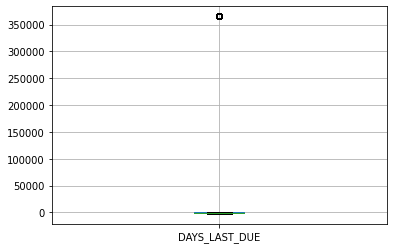

In [ ]:
prev.boxplot('DAYS_LAST_DUE')

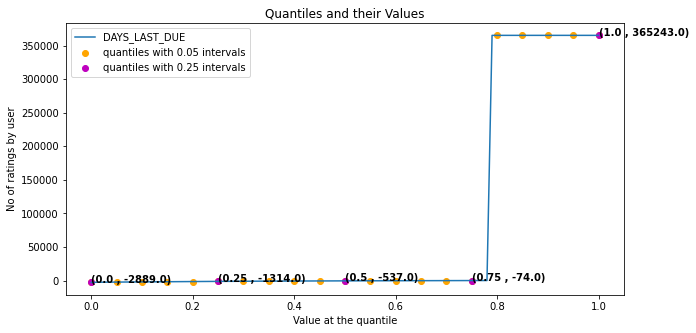

In [ ]:
# plot 1
days_last_due_quantile = prev['DAYS_LAST_DUE'].quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantile_plt(days_last_due_quantile)

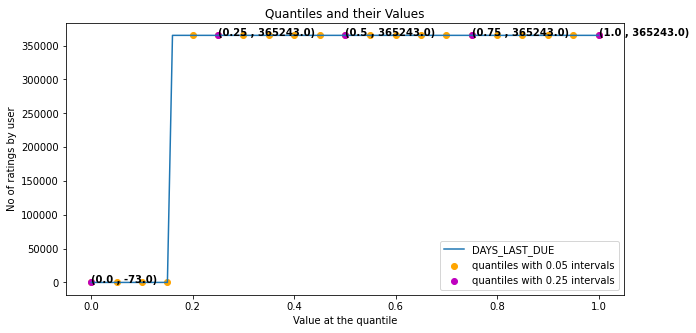

In [ ]:
#plot 2
days_last_due_quantile_last_1_per = prev[prev['DAYS_LAST_DUE'] > days_last_due_quantile.get(0.75)].DAYS_LAST_DUE.quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantile_plt(days_last_due_quantile_last_1_per)

##### Observation
1. There are some outlier points in the 80 to 100 percentiles.
2. 365246 is the outlier point value which is to be removed in Data Preprocessing step.

### 4.20 Days Termination

In [ ]:
#https://stackoverflow.com/a/21140339
Series(prev['DAYS_TERMINATION'].describe()).apply(lambda x: '%.3f' % x)

count    997149.000
mean      81992.344
std      153303.517
min       -2874.000
25%       -1270.000
50%        -499.000
75%         -44.000
max      365243.000
Name: DAYS_TERMINATION, dtype: object

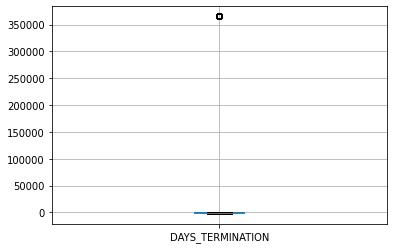

In [ ]:
prev.boxplot('DAYS_TERMINATION')

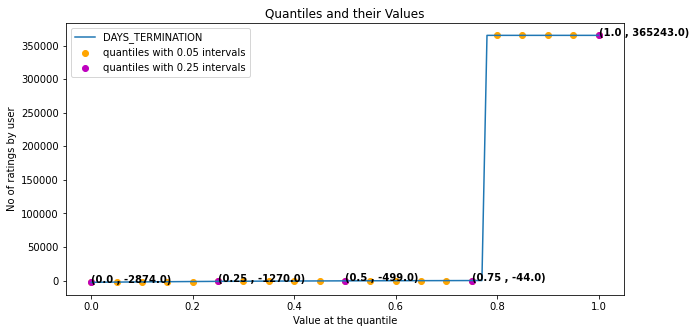

In [ ]:
# plot 1
days_last_termination_quantile = prev['DAYS_TERMINATION'].quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantile_plt(days_last_termination_quantile)

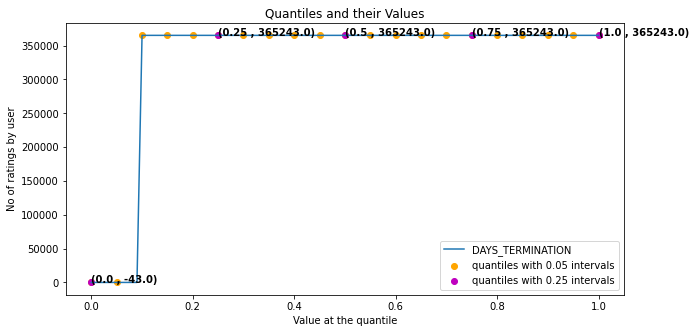

In [ ]:
#plot 2
days_last_termination_quantile_last_1_per = prev[prev['DAYS_TERMINATION'] > days_last_termination_quantile.get(0.75)].DAYS_TERMINATION.quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantile_plt(days_last_termination_quantile_last_1_per)

##### Observation
1. There are some outlier points in between 80th to 100th percentile.
2. 365246 is the outlier point.

In [ ]:
# # Number of unique classes in each object column
# categories_unique_count_list = app.select_dtypes('category').apply(pd.Series.nunique, axis = 0)
# categories_unique_count_list

In [ ]:
# fig_count = len(categories_unique_count_list)
# fig = plt.figure(figsize=(15,10))
# fig.subplots_adjust(hspace=1, wspace=.5)
# fig_count_col = 3
# for i in range(0, fig_count):
#     ax = fig.add_subplot(np.ceil(fig_count / fig_count_col), fig_count_col, i + 1)
#     app[categories_unique_count_list.index[categories_unique_count_list[i]]].value_counts().astype(float).plot.bar(
#       plt.title(categories_unique_count_list.index[categories_unique_count_list[i]], fontsize = 15)
#     )

### 4.21 Correlation

In [ ]:
# correlations = app_train.corr()['TARGET'].sort_values()

In [ ]:
# print("Top 10 Positive Correlations\n", correlations.tail(10))

In [ ]:
# print("Top 10 Negatively Correlations\n", correlations.head(10))

Lets take top 4 Negatively Correlated features (EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1 and DAYS_BIRTH)

In [ ]:
# ext_source = app_train[['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'TARGET']]

In [ ]:
# ext_sources = ext_source.corr()

In [ ]:
# plt.figure(figsize = (8, 6))

# # Heatmap of correlations
# sns.heatmap(ext_sources, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
# plt.title('Correlation Heatmap');


It is negatively correlated, as the age increases the chances of loan repayment is higher.

### Summary

1. There are total of 122 columns and 61 columns contain missing values.
2. Amount Total Income has an outlier point - 117000000
3. Amount Credit has an outlier point - 4050000
4. Days_EMPLOYED, Days First Drawing, Days First Due, Days Last Due Version 1 and Days Last Due contain `365243` values as the outlier point
5. Gender has three category (Female, Male and XNA) and XNA has only 4 datapoints so it can be removed.

## **5. Data Preprocessing**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
# # merge train and test
# app = app.append(app_test).reset_index(drop=True)
# del app_test

In [ ]:
# app.TARGET.fillna(value='UNKNOWN', inplace=True)

In [ ]:
app = app[app['CODE_GENDER'] != 'XNA']

In [ ]:
# NaN values for DAYS_EMPLOYED: 365.243 -> nan
app['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

In [ ]:
# Days 365.243 values -> nan
prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

In [ ]:
def one_hot_encoding(df):
  """
  Convert boolean feature to numerical and 
  categories with more than 2 to one hot encoding
  """
  # save original columns to convert with new colums
  original_cols = set(df.columns.to_list())

  # Convert boolean category featuers to numerical
  boolean_column_list = [col for col in df.select_dtypes('bool').dtypes.index.to_list()]
  for bin_feature in boolean_column_list:
    df[bin_feature], uniques = pd.factorize(df[bin_feature])

  # One hot encoding on features with more than two categories
  categorical_column_list = [col for col in df.select_dtypes('category').dtypes.index.to_list() if col != 'TARGET']
  df = pd.get_dummies(df, columns=categorical_column_list, dummy_na=True)

  new_cols = set(df.columns.to_list()) - original_cols
  del original_cols, boolean_column_list, categorical_column_list
  return df, new_cols

In [ ]:
app, app_cols = one_hot_encoding(app)

In [ ]:
bureau_balance, bureau_balance_cols = one_hot_encoding(bureau_balance)
bureau, bureau_cols = one_hot_encoding(bureau)

In [ ]:
prev, prev_cols = one_hot_encoding(prev)

In [ ]:
pos, pos_cols = one_hot_encoding(pos)

In [ ]:
installmentinstallment, installment_cols = one_hot_encoding(installment)

In [ ]:
cc_bal, cc_bal_cols = one_hot_encoding(cc_bal)

In [ ]:
simpleImputer_median = SimpleImputer(strategy='median')
numerical_cols = app.select_dtypes(include=['int64', 'float64', 'uint8']).columns
app[numerical_cols] = simpleImputer_median.fit_transform(app[numerical_cols])

## **6. Feature Engineering and  Aggregation**

### **6.1 Application (train|test)**

Reference: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

**CREDIT_INCOME_PERCENT**: the percentage of the credit amount relative to a client's income

**ANNUITY_INCOME_PERCENT**: the percentage of the loan annuity relative to a client's income

**CREDIT_TERM**: the length of the payment in months (since the annuity is the monthly amount due

**DAYS_EMPLOYED_PERCENT**: the percentage of the days employed relative to the client's age

Reference for Data Aggregation from different files : https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features


In [ ]:
# Some simple new features (percentages)
app['DAYS_EMPLOYED_PERC'] = app['DAYS_EMPLOYED'] / app['DAYS_BIRTH']
app['INCOME_CREDIT_PERC'] = app['AMT_INCOME_TOTAL'] / app['AMT_CREDIT']
app['INCOME_PER_PERSON'] = app['AMT_INCOME_TOTAL'] / app['CNT_FAM_MEMBERS']
app['ANNUITY_INCOME_PERC'] = app['AMT_ANNUITY'] / app['AMT_INCOME_TOTAL']
app['PAYMENT_RATE'] = app['AMT_ANNUITY'] / app['AMT_CREDIT']

app['CREDIT_INCOME_PERCENT'] = app['AMT_CREDIT'] / app['AMT_INCOME_TOTAL']
app['ANNUITY_INCOME_PERCENT'] = app['AMT_ANNUITY'] / app['AMT_INCOME_TOTAL']
app['CREDIT_TERM'] = app['AMT_ANNUITY'] / app['AMT_CREDIT']
app['DAYS_EMPLOYED_PERCENT'] = app['DAYS_EMPLOYED'] / app['DAYS_BIRTH']

### **6.2 Bureau and Bureau Balance**

In [ ]:
bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
for col in list(bureau_balance_cols):
  bb_aggregations[col] = ['mean']

In [ ]:
bb_agg = bureau_balance.groupby('SK_ID_BUREAU').agg(bb_aggregations)
del bb_aggregations

In [ ]:
bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.to_list()])

In [ ]:
bureau = bureau.join(bb_agg, how = 'left', on = 'SK_ID_BUREAU')

In [ ]:
bureau.drop(['SK_ID_BUREAU'], axis=1, inplace=True)

In [ ]:
# Bureau and bureau_balance numeric features
num_aggregations = {
    'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
    'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
    'DAYS_CREDIT_UPDATE': ['mean'],
    'CREDIT_DAY_OVERDUE': ['max', 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': ['mean'],
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['mean'],
    'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
    'AMT_ANNUITY': ['max', 'mean'],
    'CNT_CREDIT_PROLONG': ['sum'],
    'MONTHS_BALANCE_MIN': ['min'],
    'MONTHS_BALANCE_MAX': ['max'],
    'MONTHS_BALANCE_SIZE': ['mean', 'sum']
}

In [ ]:
# Bureau and bureau_balance categorical features
cat_aggregations = {}
for cat in bureau_cols:
    cat_aggregations[cat] = ['mean']
for cat in bureau_balance_cols:
    cat_aggregations[cat + "_MEAN"] = ['mean']

In [ ]:
bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})

In [ ]:
bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])

In [ ]:
# Bureau: Active credits - using only numerical aggregations
active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper()
                                for e in active_agg.columns.tolist()])
bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')

In [ ]:
# Bureau: Closed credits - using only numerical aggregations
closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper()
                                for e in closed_agg.columns.tolist()])
bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')

In [ ]:
del active_agg, closed_agg, cat_aggregations, num_aggregations, bureau, bureau_balance

### **6.3  Previous Application**

In [ ]:
# Add feature: value ask / value received percentage
prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']

In [ ]:
# Previous applications numeric features
num_aggregations = {
    'AMT_ANNUITY': ['min', 'max', 'mean'],
    'AMT_APPLICATION': ['min', 'max', 'mean'],
    'AMT_CREDIT': ['min', 'max', 'mean'],
    'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
    'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
    'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
    'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'DAYS_DECISION': ['min', 'max', 'mean'],
    'CNT_PAYMENT': ['mean', 'sum'],
}

# Previous applications categorical features
cat_aggregations = {}
for cat in prev_cols:
  cat_aggregations[cat] = ['mean']

In [ ]:
prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])

In [ ]:
# Previous Applications: Approved Applications - only numerical features
approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')


In [ ]:
# Previous Applications: Refused Applications - only numerical features
refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')

In [ ]:
del refused, refused_agg, approved, approved_agg, prev, num_aggregations, cat_aggregations

### **6.4 POS CASH Balance**

In [ ]:
aggregations = {
    'MONTHS_BALANCE': ['max', 'mean', 'size'],
    'SK_DPD': ['max', 'mean'],
    'SK_DPD_DEF': ['max', 'mean']
}
for cat in pos_cols:
    aggregations[cat] = ['mean']

In [ ]:
pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
# Count pos cash accounts
pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()

In [ ]:
del pos, aggregations

### **6.5 Installment Payments**

In [ ]:
# Percentage and difference paid in each installment (amount paid and installment value)
installment['PAYMENT_PERC'] = installment['AMT_PAYMENT'] / installment['AMT_INSTALMENT']
installment['PAYMENT_DIFF'] = installment['AMT_INSTALMENT'] - installment['AMT_PAYMENT']

In [ ]:
# Days past due and days before due (no negative values)
installment['DPD'] = installment['DAYS_ENTRY_PAYMENT'] - installment['DAYS_INSTALMENT']
installment['DBD'] = installment['DAYS_INSTALMENT'] - installment['DAYS_ENTRY_PAYMENT']
installment['DPD'] = installment['DPD'].apply(lambda x: x if x > 0 else 0)
installment['DBD'] = installment['DBD'].apply(lambda x: x if x > 0 else 0)

In [ ]:
# Features: Perform aggregations
aggregations = {
    'NUM_INSTALMENT_VERSION': ['nunique'],
    'DPD': ['max', 'mean', 'sum'],
    'DBD': ['max', 'mean', 'sum'],
    'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
    'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
    'AMT_INSTALMENT': ['max', 'mean', 'sum'],
    'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
    'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
}

In [ ]:
for cat in installment_cols:
    aggregations[cat] = ['mean']

In [ ]:
ins_agg = installment.groupby('SK_ID_CURR').agg(aggregations)

In [ ]:
ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])

In [ ]:
del installment, aggregations

### **6.6 Credit Card Balance**

In [ ]:
cc_bal.drop(['SK_ID_PREV'], axis = 1, inplace = True)

In [ ]:
cc_agg = cc_bal.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])

In [ ]:
# Count credit card lines
cc_agg['CC_COUNT'] = cc_bal.groupby('SK_ID_CURR').size()

In [ ]:
del cc_bal, cc_bal_cols

### **6.7 Aggregate Features**

In [ ]:
app.join(bb_agg, how='left', on='SK_ID_CURR')
app.join(prev_agg, how='left', on='SK_ID_CURR')
app.join(pos_agg, how='left', on='SK_ID_CURR')
app.join(ins_agg, how='left', on='SK_ID_CURR')
app.join(cc_agg, how='left', on='SK_ID_CURR')

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,CC_NAME_CONTRACT_STATUS_Active_MAX,CC_NAME_CONTRACT_STATUS_Active_MEAN,CC_NAME_CONTRACT_STATUS_Active_SUM,CC_NAME_CONTRACT_STATUS_Active_VAR,CC_NAME_CONTRACT_STATUS_Approved_MIN,CC_NAME_CONTRACT_STATUS_Approved_MAX,CC_NAME_CONTRACT_STATUS_Approved_MEAN,CC_NAME_CONTRACT_STATUS_Approved_SUM,CC_NAME_CONTRACT_STATUS_Approved_VAR,CC_NAME_CONTRACT_STATUS_Completed_MIN,CC_NAME_CONTRACT_STATUS_Completed_MAX,CC_NAME_CONTRACT_STATUS_Completed_MEAN,CC_NAME_CONTRACT_STATUS_Completed_SUM,CC_NAME_CONTRACT_STATUS_Completed_VAR,CC_NAME_CONTRACT_STATUS_Demand_MIN,CC_NAME_CONTRACT_STATUS_Demand_MAX,CC_NAME_CONTRACT_STATUS_Demand_MEAN,CC_NAME_CONTRACT_STATUS_Demand_SUM,CC_NAME_CONTRACT_STATUS_Demand_VAR,CC_NAME_CONTRACT_STATUS_Refused_MIN,CC_NAME_CONTRACT_STATUS_Refused_MAX,CC_NAME_CONTRACT_STATUS_Refused_MEAN,CC_NAME_CONTRACT_STATUS_Refused_SUM,CC_NAME_CONTRACT_STATUS_Refused_VAR,CC_NAME_CONTRACT_STATUS_Sent proposal_MIN,CC_NAME_CONTRACT_STATUS_Sent proposal_MAX,CC_NAME_CONTRACT_STATUS_Sent proposal_MEAN,CC_NAME_CONTRACT_STATUS_Sent proposal_SUM,CC_NAME_CONTRACT_STATUS_Sent proposal_VAR,CC_NAME_CONTRACT_STATUS_Signed_MIN,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100002.0,1,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003.0,0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,0.533482,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004.0,0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506155,0.555912,0.729567,0.0880,0.0765,0.9816,0.7552,0.0213,0.00,0.1379,0.1667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006.0,0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506155,0.650442,0.533482,0.0880,0.0765,0.9816,0.7552,0.0213,0.00,0.1379,0.1667,...,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,100007.0,0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,11.0,0.0,0.0,0.0,0.0,1.0,1.0,0.506155,0.322738,0.533482,0.0880,0.0765,0.9816,0.7552,0.0213,0.00,0.1379,0.1667,...,NaN,NaN,

In [ ]:
# np.where(np.isinf(app))

## **7. Split Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
feats = [f for f in app.columns if f not in ['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index']]

In [ ]:
app[app['TARGET'] != 'UNKNOWN']

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,ORGANIZATION_TYPE_nan,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,FONDKAPREMONT_MODE_nan,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_nan,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002.0,1,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.067329,0.498036,202500.0,0.121978,0.060749,2.007889,0.121978,0.060749,0.067329
1,100003.0,0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,0.533482,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.070862,0.208736,135000.0,0.132217,0.027598,4.790750,0.132217,0.027598,0.070862
2,100004.0,0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506155,0.555912,0.729567,0.0880,0.0765,0.9816,0.7552,0.0213,0.00,0.1379,0.1667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.011814,0.500000,67500.0,0.100000,0.050000,2.000000,0.100000,0.050000,0.011814
3,100006.0,0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506155,0.650442,0.533482,0.0880,0.0765,0.9816,0.7552,0.0213,0.00,0.1379,0.1667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.159905,0.431748,67500.0,0.219900,0.094941,2.316167,0.219900,0.094941,0.159905
4,100007.0,0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,11.0,0.0,0.0,0.0,0.0,1.0,1.0,0.506155,0.322738,0.533482,0.0880,0.0765,0.9816,0.7552,0.0213,0.00,0.1379,0.1667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.152418,0.236842,121500.0,0.179963,0.042623,4.222222,0.1799

In [ ]:
data = app[app['TARGET'] != 'UNKNOWN']
data = data[feats]
target = app[app['TARGET'] != 'UNKNOWN'].TARGET.values

In [ ]:
# https://stackoverflow.com/a/36532565

bad_index = np.where(np.isinf(data))
data.values[bad_index] = -1
np.where(np.isinf(data))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
data = scalar.fit_transform(data)
# X_train = scalar.transform(X_train)
# X_cv = scalar.transform(X_cv)

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(data, target.astype(int), test_size = 0.2, stratify= target)

In [ ]:
X_test = app[app['TARGET'] == 'UNKNOWN']

In [ ]:
X_test = X_test[feats]

In [ ]:
print('Training : {}'.format(X_train.shape))
print('Test : {}'.format(X_test.shape))

Training : (246005, 269)
Test : (48744, 269)


## **8. Model Training**

In [ ]:
# import model training related classes
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC

from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import seaborn as sns
import pprint

In [ ]:
def plot_confusion_matrix(conf_matrix):
    """
      Plots Confusion Matrix 
    """
    labels = [0, 1]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(3,2))
    sns.heatmap(conf_matrix, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()


In [ ]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
def metric_helper(test_y, predict_y):
  """
    The method will perform AUC performance metric calculation.
    Return dictionary of performance measures as key value pairs. 
  """
  
  fpr, tpr, thresholds = roc_curve(test_y, predict_y)
  auc_score = auc(fpr, tpr)

  # find best threshold 
  threshold = find_best_threshold(thresholds, fpr, tpr)

  # plot confusion matrix
  conf_matrix = confusion_matrix(test_y, predict_with_best_t(test_y, threshold))
  plot_confusion_matrix(conf_matrix)

  # miss class pts
  miss_cls_percent = (len(test_y)-np.trace(conf_matrix))/len(test_y)*100
  print("Number of misclassified percentage: {}".format(miss_cls_percent))

  print('*'*50, 'ACCURACY', '*'*50)
  accuracy = accuracy_score(test_y, predict_with_best_t(test_y, threshold))
  print('Accuracy Score: {}'.format(accuracy))


  return {'AUC': auc_score, 'miss_class_pts' : miss_cls_percent, 'accuracy' : accuracy}

In [ ]:
def model_helper(model, parameter, cv, X_train_df, y_train_df, X_test_df, y_test_df, isReturnModelObject=False):
  """
  It will perform GridSearchCV and finds optimal paramater for each model.
  With optimal values again the same machine learning model is invoked.
  Calibration is performed on the probability valued and `metric_helper`
  class is called to return classification result
  """
  # grid search 
  grid_model = GridSearchCV(model, parameter, cv = cv, scoring = 'roc_auc', verbose=200)
  grid_model_fit = grid_model.fit(X_train_df, y_train_df)

  # print best parameters
  print('*'*50, "Grid Search CV: Best Hyperparameters", '*'*50, '\n')
  pprint.pprint(grid_model_fit.best_params_)
  print('*'*50,"**********************",'*'*50, '\n')
  
  best_model = best_ml_model_object_constructor(model, True, grid_model_fit.best_params_)
  best_model.fit(X_train_df, y_train_df)
  sig_clf = CalibratedClassifierCV(best_model, method='sigmoid')
  sig_clf.fit(X_train_df, y_train_df)

  y_test_proba = sig_clf.predict_proba(X_test_df)[:,1]

  result = metric_helper(y_test_df, y_test_proba)
  # return result report if False else trained model object 
  return sig_clf if isReturnModelObject else result

In [ ]:
# KNN - Hyperparamer tuning
def knn(isBestparam = False, param= None):
    """
    Defined KNN hyperparameters based on GridSearchCV or Best model condition
    """
    if not isBestparam: 
      knn_param = {
        'n_neighbors': [10, 50, 100],
        'algorithm' : ['auto'],
        'leaf_size' : [10, 30, 50, 100],
        'p' : [1, 2],
      }
      knn_obj = KNeighborsClassifier()
      return knn_obj, knn_param
    else:
      return KNeighborsClassifier(
          n_neighbors = param['n_neighbors'],
          algorithm = param['algorithm'],
          leaf_size = param['leaf_size'],
          p = param['p']
        )
 
def naive_bayes(isBestparam = False, param = None):
    """
    Defined Naive Bayes hyperparameters based on GridSearchCV or Best model condition
    """
    if not isBestparam:
      nb_param = {
          'alpha' : [.01,0.1,1,10,100,1000]
      }
      nb_obj = MultinomialNB()
      return nb_obj, nb_param
    else:
      return MultinomialNB(alpha=param['alpha'])
 
def logistic_reg(isBestparam = False, param = None):
    """
    Defined Logistic Regression hyperparameters based on GridSearchCV or Best model condition
    """
    if not isBestparam:
      log_reg_param = {
        'penalty' : ['l1', 'l2', 'elasticnet'],
        'C' : [0.001, 0.01, 0.1, 1]
      }
      log_reg_obj = LogisticRegression()
      return log_reg_obj, log_reg_param
    else:
      return LogisticRegression(penalty=param['penalty'], C = param['C'])

def svm(isBestparam = False, param = None):
    """
    Defined Support Vector Machine hyperparameters based on GridSearchCV or Best model condition
    """
    if not isBestparam:
      svc_param = {'C':[0.05,0.1,0.5,1.0],
          'gamma':['auto'],
          'kernel':['rbf']
      }
      svc_obj = SVC(cache_size=7000)
      return svc_obj, svc_param
    else:
      return SVC(C = param['C'], gamma = param['gamma'], kernel = param['kernel'])


def random_forest(isBestparam = False, param = None):
    # Hyperparamter tuning parameter used from the below link
    # https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
    """
    Defined Random Forest hyperparameters based on GridSearchCV or Best model condition
    """
    if not isBestparam: 
      rf_param = {
        'bootstrap': [True],
        'max_depth': [30, 50],
        'max_features': ['auto'],
        'min_samples_leaf': [1, 5, 15],
        'min_samples_split': [2, 5, 15],
        'n_estimators': [100, 200, 300, 1000]
      }
      rf_obj = RandomForestClassifier()
      return rf_obj, rf_param 
    else:
      return RandomForestClassifier(
              bootstrap = param['bootstrap'],
              max_depth= param['max_depth'],
              max_features= param['max_features'],
              min_samples_leaf= param['min_samples_leaf'],
              min_samples_split= param['min_samples_split'],
              n_estimators= param['n_estimators']
              )
 
def gboostclf(isBestparam = False, param = None):
    """
    Defined Gradient Boost Classifieer hyperparameters based on GridSearchCV or Best model condition
    """
  # Hyperparamter tuning parameter used from the below link
  # https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
    if not isBestparam: 
      gb_param = {'n_estimators':range(20,81,10)}
      gb_obj = GradientBoostingClassifier(
                  learning_rate=0.1, 
                  min_samples_split=500,
                  min_samples_leaf=50,
                  max_depth=8,
                  max_features='sqrt',
                  subsample=0.8,
                  random_state=10
              )
      return gb_obj, gb_param 
    else:
      return GradientBoostingClassifier(
                  n_estimators = param['n_estimators'],
                  learning_rate=0.1, 
                  min_samples_split=500,
                  min_samples_leaf=50,
                  max_depth=8,
                  max_features='sqrt',
                  subsample=0.8,
                  random_state=10
              )
 

def xgboostclf(isBestparam = False, param = None):
    """
    Defined XGBoost Classifieer hyperparameters based on GridSearchCV or Best model condition
    """
  # Hyperparamter tuning parameter used from the below link
  # https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
    if not isBestparam: 
      # Create the grid search parameter grid and scoring funcitons
      # xgboost_param = {
      #     "learning_rate": [0.1, 0.01],
      #     "colsample_bytree": [0.6, 0.8, 1.0],
      #     "subsample": [0.6, 0.8, 1.0],
      #     "max_depth": [2, 3, 4],
      #     "n_estimators": [100, 200, 300, 400],
      #     "reg_lambda": [1, 1.5, 2],
      #     "gamma": [0, 0.1, 0.3],
      # }
      xgboost_param = {
          "learning_rate": [0.1],
          "n_estimators": [100, 200, 300, 400],
      }
      xgboost_obj = XGBClassifier(
                      tree_method = "gpu_hist", 
                      random_state=1, 
                      eval_metric=["error", "auc"]
                    )
      return xgboost_obj, xgboost_param 
    else:
      # return XGBClassifier(
      #             learning_rate = param['learning_rate'],
      #             colsample_bytree=param['colsample_bytree'],
      #             subsample=param['subsample'],
      #             max_depth=param['max_depth'],
      #             n_estimators=param['n_estimators'],
      #             reg_lambda=param['reg_lambda'],
      #             gamma=param['gamma'],
      #             tree_method = "gpu_hist",
      #             eval_metric = ['error', 'auc'],
      #             random_state=1 
      #         )
      return XGBClassifier(
                  learning_rate = param['learning_rate'],
                  n_estimators = param['n_estimators'],
                  tree_method = "gpu_hist",
                  eval_metric = ['error', 'auc'],
                  random_state=1 
              )
def ml_model_object_constructor(argument):
    """
    This acts as a switch function to map through the respective models to 
    execute grid search using the type class object name
    """
    switcher = {
        1: knn,
        2: naive_bayes,
        3: logistic_reg,
        4: svm,
        5: random_forest,
        6: gboostclf,
        7: xgboostclf
    }
    # Get the function from switcher dictionary
    func = switcher.get(argument, lambda: "Invalid month")
    # Execute the function
    a = 10
    return func()

def best_ml_model_object_constructor(obj, isBestparam, param):
    """
    This acts as a switch function to map through the respective models to 
    execute best model using the type class object name
    """
    obj_class_name = type(obj).__name__
    switcher = {
        'KNeighborsClassifier'      : knn,
        'MultinomialNB'             : naive_bayes,
        'LogisticRegression'        : logistic_reg,
        'SVC'                       : svm,
        'RandomForestClassifier'    : random_forest,
        'GradientBoostingClassifier': gboostclf,
        'XGBClassifier'             : xgboostclf
    }
    # Get the function from switcher dictionary
    func = switcher.get(obj_class_name, lambda: "Invalid month")
    # Execute the function
    a = 10
    return func(isBestparam, param)

In [ ]:
over_all_result = dict()
models_id_list = [7]

In [ ]:
result = dict()
obj, param = ml_model_object_constructor(7)
print('*'*50, 'Model Running:', type(obj).__name__ , '*'*50, '\n')
result[type(obj).__name__] = model_helper(obj, param, 5, X_train, y_train, X_cv, y_cv, isReturnModelObject=True)


************************************************** Model Running: XGBClassifier ************************************************** 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] . learning_rate=0.1, n_estimators=100, score=0.747, total=  38.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.0s remaining:    0.0s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] . learning_rate=0.1, n_estimators=100, score=0.764, total=  36.7s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] . learning_rate=0.1, n_estimators=100, score=0.753, total=  37.2s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.9min remaining:    0.0s
[CV] learning_rate=0.1, n_estimators=100 ...................

KeyboardInterrupt: ignored

In [ ]:
result[type(obj).__name__].predict_proba(X_test)

In [ ]:
log_reg_pred_proba = result[type(obj).__name__].predict_proba(X_test)[:, 1]

In [ ]:
app_test = pd.read_csv('data/application_test.csv', usecols =['SK_ID_CURR'])
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred_proba
submit['TARGET'].astype(int)
submit['SK_ID_CURR'] = submit['SK_ID_CURR'].astype(int)
submit.head()

In [ ]:
# Save the submission to a csv file
submit.to_csv('log_reg_pred_proba.csv', index = False)

In [ ]:
!kaggle competitions submit -c home-credit-default-risk -f log_reg_pred_proba.csv -m "fifth Submit"